- **Regression** logistique : col num uniquement
score train, score test, pipeline(knnimputer, standard scaler, regression log) = dans gridsearch avec 10 crossvalidation et ressortir le score

- *Pipeline*(features num, knnimputer, scaler, et features cat à onehot (knn imputer random forest classifier,dummy regressor, reg log, KNN)) = calculer ACCURACY SCORE
et resultgrid

On peut frac = 0.25 , 0.30 ou 0.20


[mon super lien](http://cneuuziu.com)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px


In [3]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector


In [4]:

# Feature Selection
import shap

d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div style="background-color:#9dedde; padding: 10px">
<h2>Chargement des données</h2>
</div>

In [5]:
df = pd.read_csv("app_train_sample_clean.csv")
df.head(5)

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_Maternity leave,TYPE_REVENUS_State servant,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,47,196888,0,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,...,0,0,1,0,1,0,0,0,0,1
1,54,101392,0,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,...,0,0,1,0,1,0,0,0,1,1
2,25,435135,0,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,...,0,0,1,0,1,0,0,0,0,0
3,29,396314,0,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,...,0,0,1,1,1,0,0,0,0,1
4,44,341153,1,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,...,0,0,1,0,0,0,0,1,0,1


In [6]:
df.shape

(25146, 29)

In [7]:
df.tail()

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_Maternity leave,TYPE_REVENUS_State servant,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
25141,33,332801,0,15,992556.0,29151.0,1.0,711000.0,135000.0,0.441798,...,0,0,1,1,0,0,0,1,1,0
25142,41,351130,0,5,117162.0,11718.0,1.0,103500.0,144000.0,0.342067,...,0,0,1,0,0,0,0,1,0,0
25143,41,311641,0,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,...,0,1,0,0,0,0,0,1,0,2
25144,37,151728,1,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,...,0,0,1,1,0,0,0,1,0,0
25145,58,389739,0,3,1288350.0,37053.0,1.0,1125000.0,148500.0,0.670388,...,0,0,1,0,0,0,0,1,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25146 entries, 0 to 25145
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   AGE                                             25146 non-null  int64  
 1   ID_CLIENT                                       25146 non-null  int64  
 2   CIBLE                                           25146 non-null  int64  
 3   YEARS_EMPLOYED                                  25146 non-null  int64  
 4   TOTAL_CREDIT                                    25146 non-null  float64
 5   REMB_MENSUEL                                    25146 non-null  float64
 6   CNT_FAM_MEMBERS                                 25146 non-null  float64
 7   MONTANT_PRIX_BIENS                              25127 non-null  float64
 8   REVENU_TOTAL                                    25146 non-null  float64
 9   SOURCE_EXTERNE_2                       

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Analyse exploratoire</b>
    </h2>
</div>


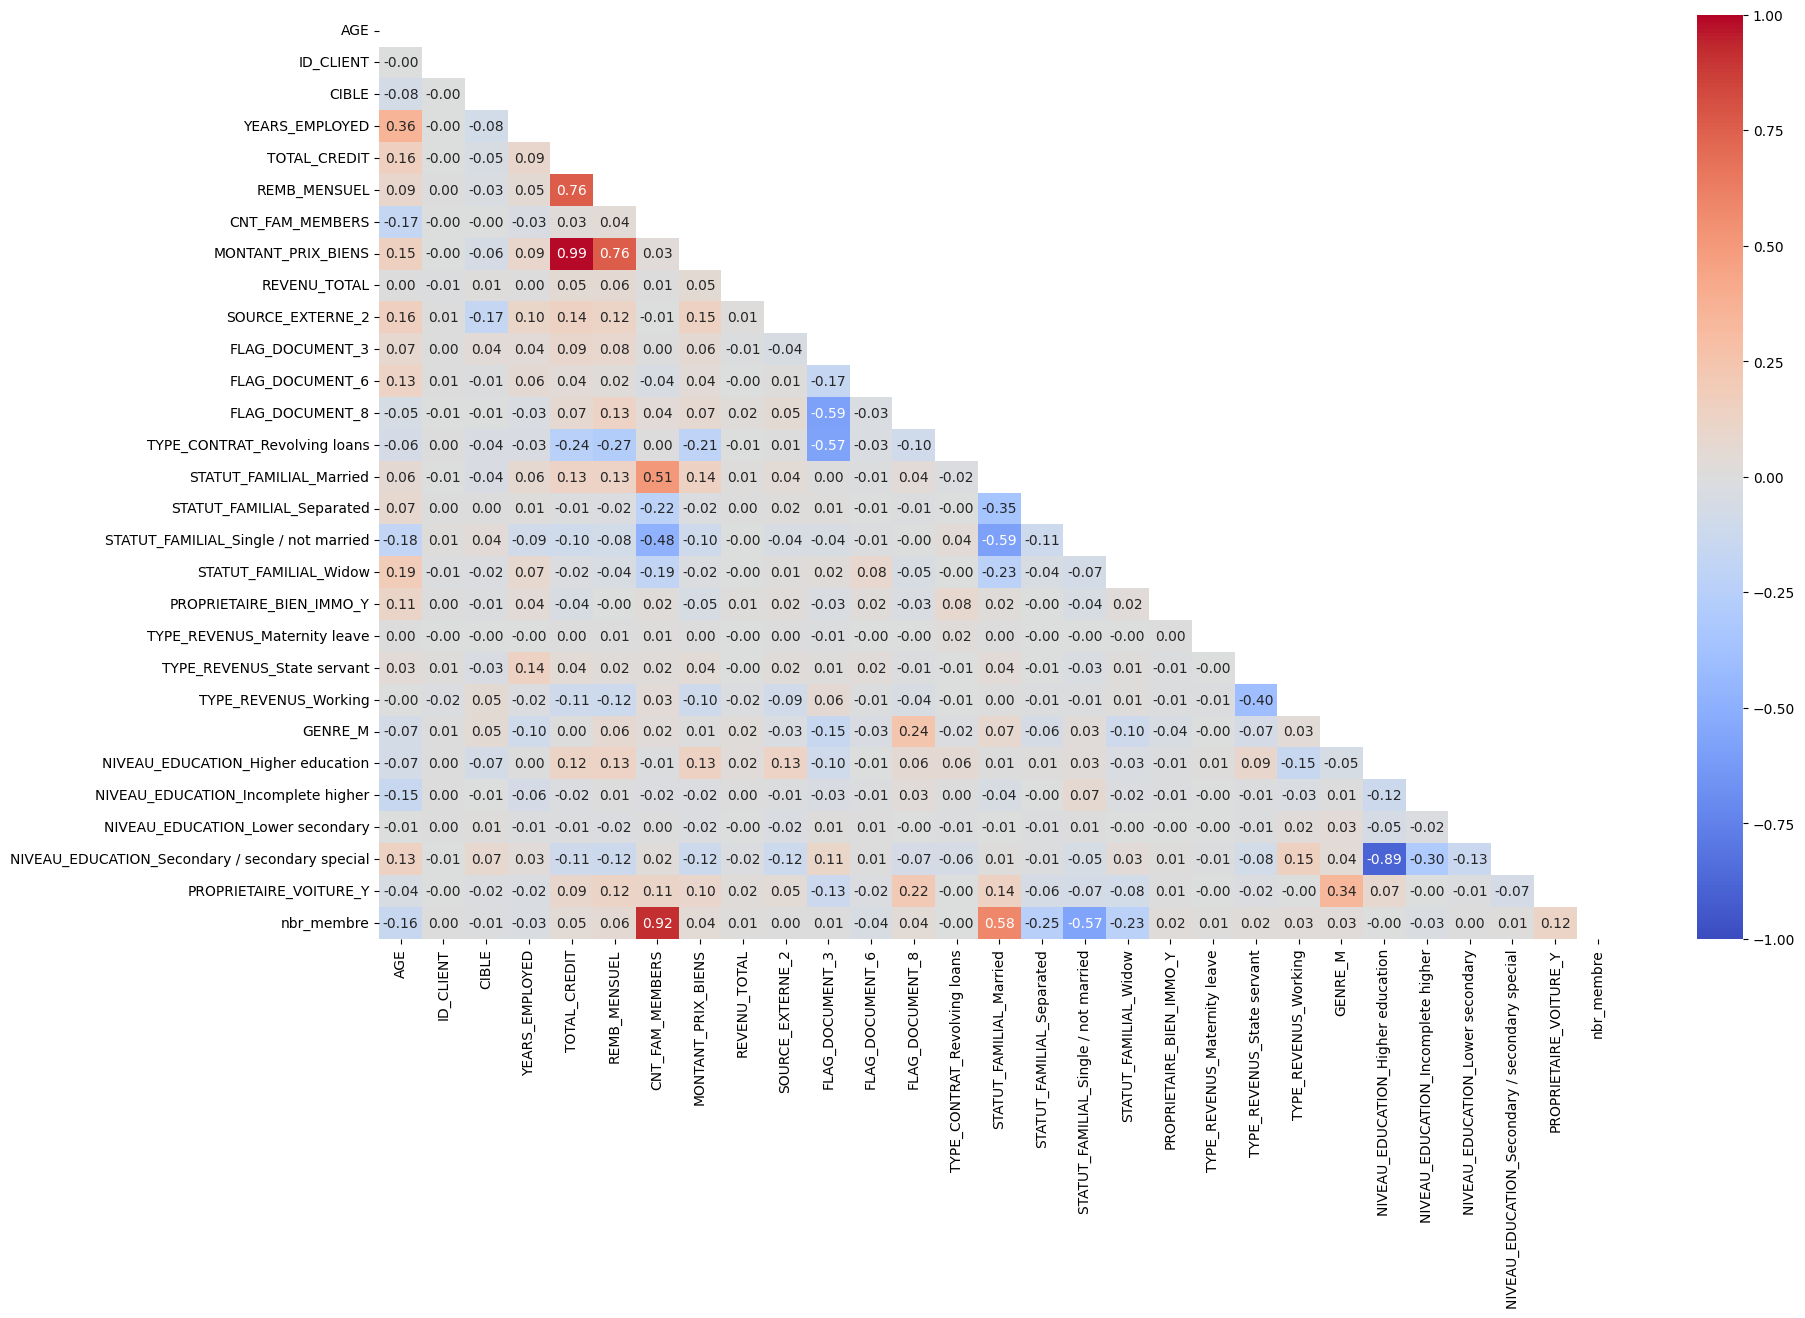

In [9]:
plt.figure(figsize=(20, 12))
corr = df.select_dtypes(include=("float64", "int64")).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask, annot=True)
plt.show()

In [10]:
df = df.sample(frac=0.10)


In [11]:
df

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_Maternity leave,TYPE_REVENUS_State servant,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
3091,38,404008,0,7,227520.0,13189.5,1.0,180000.0,225000.0,0.453715,...,0,1,0,0,1,0,0,0,0,0
17804,43,236278,0,26,225000.0,11250.0,1.0,225000.0,90000.0,0.700686,...,0,0,1,0,0,0,0,1,0,0
5674,49,178371,0,11,700830.0,20619.0,2.0,585000.0,157500.0,0.359993,...,0,0,1,0,0,0,0,1,0,1
13250,48,294253,0,6,405000.0,20250.0,3.0,405000.0,171000.0,0.706651,...,0,0,0,0,0,0,0,1,0,2
13134,38,229935,0,5,1125000.0,78300.0,2.0,1125000.0,270000.0,0.577734,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21371,42,344244,0,7,545040.0,20677.5,2.0,450000.0,112500.0,0.662132,...,0,0,1,0,0,0,0,1,0,1
10197,52,303166,0,20,450000.0,24543.0,2.0,450000.0,135000.0,0.449978,...,0,0,1,1,0,0,0,1,0,1
7790,59,255494,0,7,677664.0,41589.0,1.0,585000.0,405000.0,0.645143,...,0,0,0,1,1,0,0,0,0,0
10237,53,449609,0,9,517500.0,16821.0,2.0,517500.0,112500.0,0.478656,...,0,0,0,0,0,0,0,1,1,1


In [12]:
19/3000

0.006333333333333333

In [13]:
# df_1 =df.loc[df.CIBLE==1]
# df_1

In [14]:
# n = df_1.shape[0]

In [15]:
# df_0 = df.loc[df.CIBLE==0]
# df_0 = df_0.sample(n)
# df_0

In [16]:
# df = pd.concat([df_0, df_1], axis=0, ignore_index = True)
# df

In [17]:
y = df["CIBLE"]

In [18]:
y.shape

(2515,)

In [19]:
# Dataframe des autres features, supression des targets
x_train = df.copy()

col_cible = ["ID_CLIENT", "CIBLE"]
x_train.drop(col_cible, axis=1, inplace=True)
x_train

,AGE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,...,TYPE_REVENUS_Maternity leave,TYPE_REVENUS_State servant,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
3091,38,7,227520.0,13189.5,1.0,180000.0,225000.0,0.453715,1,0,...,0,1,0,0,1,0,0,0,0,0
17804,43,26,225000.0,11250.0,1.0,225000.0,90000.0,0.700686,0,0,...,0,0,1,0,0,0,0,1,0,0
5674,49,11,700830.0,20619.0,2.0,585000.0,157500.0,0.359993,1,0,...,0,0,1,0,0,0,0,1,0,1
13250,48,6,405000.0,20250.0,3.0,405000.0,171000.0,0.706651,0,0,...,0,0,0,0,0,0,0,1,0,2
13134,38,5,1125000.0,78300.0,2.0,1125000.0,270000.0,0.577734,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21371,42,7,545040.0,20677.5,2.0,450000.0,112500.0,0.662132,1,0,...,0,0,1,0,0,0,0,1,0,1
10197,52,20,450000.0,24543.0,2.0,450000.0,135000.0,0.449978,1,0,...,0,0,1,1,0,0,0,1,0,1
7790,59,7,677664.0,41589.0,1.0,585000.0,405000.0,0.645143,1,0,...,0,0,0,1,1,0,0,0,0,0
10237,53,9,517500.0,16821.0,2.0,517500.0,112500.0,0.478656,1,0,...,0,0,0,0,0,0,0,1,1,1


In [20]:
x_train.shape

(2515, 27)

In [21]:
x_train.dtypes

AGE                                                 int64
YEARS_EMPLOYED                                      int64
TOTAL_CREDIT                                      float64
REMB_MENSUEL                                      float64
CNT_FAM_MEMBERS                                   float64
MONTANT_PRIX_BIENS                                float64
REVENU_TOTAL                                      float64
SOURCE_EXTERNE_2                                  float64
FLAG_DOCUMENT_3                                     int64
FLAG_DOCUMENT_6                                     int64
FLAG_DOCUMENT_8                                     int64
TYPE_CONTRAT_Revolving loans                        int64
STATUT_FAMILIAL_Married                             int64
STATUT_FAMILIAL_Separated                           int64
STATUT_FAMILIAL_Single / not married                int64
STATUT_FAMILIAL_Widow                               int64
PROPRIETAIRE_BIEN_IMMO_Y                            int64
TYPE_REVENUS_M

In [22]:
1/0

ZeroDivisionError: division by zero

In [ ]:
#categ_col = x_train.select_dtypes(["object"]).columns
num_col = x_train.select_dtypes(["float64", "int64"]).columns

In [ ]:
categ_col

In [ ]:
categ_col.shape

In [ ]:
num_col

In [ ]:
num_col.shape

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Modélisation</b>
    </h2>
</div>


In [ ]:
# Créer les transformateurs
numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

#categorical_transformer = make_pipeline(
 #   SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")
#)


#preprocessor_1 = ColumnTransformer(
#    transformers=[
 #       ("num", numeric_transformer, num_col),
  #      ("cat", categorical_transformer, categ_col),
   # ],
    #remainder="drop",
#)



#pipeline = Pipeline(
 #   steps=[
  #      ("preprocessor", preprocessor_1),
   #     ("sampler", RandomUnderSampler()),
    #    ("estimator", RandomForestClassifier()),
    #]
#)

In [ ]:
# Créer les transformateurs
numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())



preprocessor_1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_col)],
    remainder="drop")



pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor_1),
        ("sampler", RandomUnderSampler()),
        ("estimator", RandomForestClassifier()),
    ]
)

In [ ]:
def resultize(grid):
    res = pd.DataFrame(grid.cv_results_)  # Utilisez la méthode cv_results_()
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]
    res.sort_values("mean_test_score", ascending=False, inplace=True)
    return res

In [ ]:
param_grid = {

    "estimator": [RandomForestClassifier()],  # LogisticRegression(), DummyClassifier(),
    #'preprocessor__num__simpleimputer__strategy': ['mean', 'median'],
    #'preprocessor__cat__simpleimputer__strategy': ['most_frequent', 'constant', 'mean'],
    #'estimator__C': [0.1, 1.0, 10.0]
    "estimator__n_estimators" : [100, 200, 300, 500]
}

param_grid

In [ ]:
1/0

In [ ]:
from sklearn.metrics import get_scorer_names # mettre en haut

In [ ]:
get_scorer_names()

In [ ]:
grid_1 = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose=2,
    scoring="f1",
)
grid_1

In [ ]:
print("Pipeline Steps:", pipeline.named_steps)

grid_1.fit(x_train, y)

In [ ]:
resultize(grid_1)

In [ ]:
y.value_counts(normalize=True)

In [ ]:
best_model = grid_1.best_estimator_

best_model

In [ ]:

# mettre en haut ==> double import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Séparez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    x_train, y, test_size=0.2, random_state=42
)

## Init and Fit a Grid Search

In [ ]:
# Utilisez GridSearchCV pour ajuster votre modèle
grid_1 = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose=2,
    scoring="f1",
)
grid_1.fit(X_train, y_train)

In [ ]:
df.columns.tolist()

In [ ]:
pipe = grid_1.best_estimator_
pipe

In [ ]:
X_train.shape

## Feature Importance

In [ ]:
est = pipe.steps[-1]
est = est[1]
est

In [ ]:
preprocessor = pipe[:-1]

In [ ]:
feature_names_out = preprocessor.get_feature_names_out()
feature_names_out

In [ ]:
feat_imp = est.feature_importances_
feat_imp 

In [ ]:
len(est.feature_importances_)

In [ ]:
feature_imp_dict = {k: v for k, v in zip(feature_names_out, feat_imp)}
feature_imp_dict

In [ ]:
# Recupere la feat importance, créé un pd.Serie et on filtre
feature_imp_ser = pd.Series(feature_imp_dict)
feature_imp_ser = feature_imp_ser.sort_values(ascending=False)
feature_imp_ser = feature_imp_ser[feature_imp_ser > 0.01]
feature_imp_ser = feature_imp_ser.round(4)

feature_imp_ser

In [ ]:
# save la feat importance

import pickle as pk  #  remonter la haut

with open("feat_importance.pk", "wb") as f : 
    pk.dump(feature_imp_ser, f)

## Travaille sur Shap

In [ ]:
def build_x_train_preprocessor(pipe, x_train):

    preprocessor = pipe.steps[0]
    preprocessor = preprocessor[1]
    preprocessor

    feat_name_out = preprocessor.get_feature_names_out()
    feat_name_out

    x_train_after_preprocess = preprocessor.transform(x_train)
    x_train_after_preprocess

    x_train_after_preprocess = pd.DataFrame(
        x_train_after_preprocess, columns=feat_name_out
    )

    return x_train_after_preprocess



def extract_est(pipe) : 

    return pipe.steps[-1][1]

In [ ]:
x_train_after_preprocess = build_x_train_preprocessor(pipe, X_train)
x_train_after_preprocess

In [ ]:
x_train_after_preprocess.shape

In [ ]:
explainer = shap.TreeExplainer(est, x_train_after_preprocess)
explainer

In [ ]:
#explainer.__dict__.keys()


In [ ]:
with open("shap_explainer.pk", "wb") as f:
    pk.dump(explainer, f)

In [ ]:
[i for i in explainer.__dir__() if "__" not in i]

In [ ]:
def shapeit(i, explainer, x_train_after_preprocess):
    """take x_train_after_preprocess and i and give back shap values"""

    val_ = explainer.shap_values(x_train_after_preprocess.iloc[i])
    val_ = pd.DataFrame(
        val_, index=x_train_after_preprocess.columns, columns=["TRUE", "FALSE"]
    )
    val_ = val_.iloc[:, 0].sort_values(ascending=False).head(15)

    return val_.round(4).to_dict()

In [ ]:
explainer.__dict__.keys()

In [ ]:
x_train_after_preprocess.iloc[:100]

In [ ]:
shap_values = explainer(x_train_after_preprocess, check_additivity=False)
shap_values

In [ ]:
import pickle as pk

with open("shap.pk", "wb") as f : 
    pk.dump(shap_values, f)

## Test shap values for one id

In [ ]:
x_train_after_preprocess.iloc[10, :]

In [ ]:
x_train_after_preprocess.isna().sum().sum()

In [ ]:
x_train_after_preprocess

In [ ]:
2460*2

In [ ]:
4920/2

In [ ]:
x_train_after_preprocess.iloc[2400].to_dict()

In [ ]:
shap.force_plot(
    shap_values.base_values[0],  # Utilisation de la valeur de base pour la première classe
    shap_values.values[:1000],   # Les valeurs SHAP pour les 1000 premières instances
    x_train_after_preprocess.iloc[:1000, :],  # Les données pour les 1000 premières instances
)


In [ ]:
x_train

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>First Approch</b>
    </h2>
</div>


In [ ]:
# y_pred = notre prediction finale 'oui ou non'
# y_true = CIBLE

In [ ]:
# def calcul_benef(total_credit, y_true, y_pred, taux_interet=0.04):
#    'on accorde un crédit, ou on refuse'
#    if y_pred : #cas où on refuse le crédit
#        return 0
#    else :
#        if y_true  :#On accorde le crédit donc on fait un bénéfice
#            total_credit * taux_interet
#            return total_credit * taux_interet
#        if  y_true ==1 :
#             return -total_credit *0.25 #On met un - car on a perdu le crédit accordé non remboursé


def calcul_benef(montant, y_true, y_pred, taux=0.04, default_rate=1):
    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [ ]:
calcul_benef(1000, 0, 0)

In [ ]:
calcul_benef(1000, 1, 0)

In [ ]:
calcul_benef(1000, 1, 1)

In [ ]:
def calcul_benef_bis(row, taux_interet=0.04):
    if row["CIBLE"] == 1:  # cas où on refuse le crédit
        return pd.Series(
            {"benef": 0, "pertes": -row["TOTAL_CREDIT"] * 0.25}
        )  # Pertes avec un signe négatif
    else:
        if row["CIBLE"] == 0:  # On accorde le crédit donc on fait un bénéfice
            benef = row["TOTAL_CREDIT"] * taux_interet
            return pd.Series({"benef": benef, "pertes": 0})
        else:
            pertes = (
                -row["TOTAL_CREDIT"] * 0.25
            )  # On met un - car on a perdu le crédit accordé non remboursé
            return pd.Series({"benef": 0, "pertes": pertes})

In [ ]:
df[["benef", "pertes"]] = df.apply(calcul_benef_bis, axis=1)

In [ ]:
df[["TOTAL_CREDIT", "CIBLE", "benef", "pertes"]]

In [ ]:
y_pred_list = grid_1.predict(X_test)
y_pred_list

In [ ]:
y_true_list = y_test.values
y_true_list

In [ ]:
montant_list = X_test.loc[:, "TOTAL_CREDIT"].values
montant_list

In [ ]:
l1 = ["a", "b"]
l2 = [0, 1]

In [ ]:
v = 0
for m, y_true, y_pred in zip(montant_list, y_true_list, y_pred_list):
    v += calcul_benef(m, y_true=y_true, y_pred=y_pred)
round(v / 1_000_000, 2)

In [ ]:
sum(montant_list / 1_000_000).round(2)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Prédict Proba</b>
    </h2>
</div>


In [ ]:
X_test

In [ ]:
y_pred_proba_list = grid_1.predict_proba(X_test)
y_pred_proba_list = list(y_pred_proba_list[:, 0])
y_pred_proba_list = [round(x, 4) for x in y_pred_proba_list]
y_pred_proba_list[:10]

In [ ]:
def calcul_pnl_one_complexe(
    montant,
    y_true,
    y_pred_proba,
    taux=0.04,
    default_rate=1,
    threshold=0.5,
):
    y_pred = 0 if y_pred_proba > threshold else 1

    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba)
round(v / 1_000_000, 2)

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=0.0
    )
round(v / 1_000_000, 2)

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=1
    )
round(v / 1_000_000, 2)

In [ ]:
threshold_list = np.linspace(0, 1, 100)
pnl_list = []

taux = 0.04
default_rate = 1
for threshold in threshold_list:
    v = 0
    for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
        v += calcul_pnl_one_complexe(
            m,
            y_true=y_true,
            y_pred_proba=y_pred_proba,
            threshold=threshold,
            default_rate=default_rate,
            taux=taux,
        )
    pnl_list.append(v)

In [ ]:
plt.plot(threshold_list, pnl_list)

In [ ]:
px.line(x=threshold_list, y=pnl_list)

In [ ]:
pnl_df = pd.DataFrame({"threshold": threshold_list, "pnl": pnl_list}).sort_values(
    by="pnl", ascending=False
)
pnl_df

In [ ]:
pnl_df.sort_values(by="pnl", ascending=False).head(10)

In [ ]:
def analyse_pnl(taux=0.04, default_rate=1):
    threshold_list = np.linspace(0, 1, 100)
    pnl_list = []

    for threshold in threshold_list:
        v = 0
        for m, y_true, y_pred_proba in zip(
            montant_list, y_true_list, y_pred_proba_list
        ):
            v += calcul_pnl_one_complexe(
                m,
                y_true=y_true,
                y_pred_proba=y_pred_proba,
                threshold=threshold,
                default_rate=default_rate,
                taux=taux,
            )
        pnl_list.append(v)


fig = px.line(x=threshold_list, y=pnl_list)
fig.show()

In [ ]:
analyse_pnl(taux=0.04, default_rate=1)

In [ ]:
analyse_pnl(0.04, 0.25)

In [ ]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.025, 0.25)

In [ ]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.03, 0.25)

In [ ]:
1/0

# SHAP VALUES

In [ ]:
# Calculer le bénéfice sur l'intégralité du dataset = sur tous les clients
# Calculer le predict_proba